## JPEG圧縮(step.3) YCbCr表色系

In [16]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline
def BGR2YCbCr(img):
    H, W, _ = img.shape
    ycbcr =  np.zeros([H, W, 3], dtype=np.float32)
    
    ycbcr[..., 0] = 0.299*img[..., 2] + 0.5870*img[..., 1] + 0.114*img[..., 0]
    ycbcr[..., 1] = -0.1687*img[..., 2] -0.3313*img[..., 1] + 0.5*img[..., 0] +128.
    ycbcr[..., 2] = 0.5*img[..., 2] -0.4187*img[..., 1] - 0.0813*img[..., 0] +128.
    
    return ycbcr

def YCbCr2BGR(ycbcr):
    H, W, _ = ycbcr.shape
    
    out = np.zeros([H, W, 3], dtype=np.float32)
    
    out[...,2] = ycbcr[..., 0] + (ycbcr[..., 2] - 128)*1.402
    out[...,1] = ycbcr[..., 0] - (ycbcr[..., 1] - 128)*0.3441 - (ycbcr[..., 2] - 128)*0.7139
    out[...,0] = ycbcr[..., 0] + (ycbcr[..., 1] - 128)*1.7718
    
     
    out = np.clip(out, 0, 255)
    # これをしないだけで図画全然違くなる
    out = out.astype(np.uint8)
    
    return out
    

True

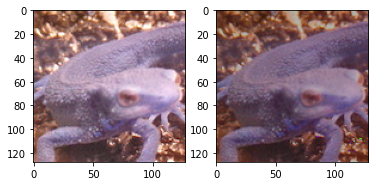

In [19]:
# imread
img = cv2.imread('../imori.jpg')
plt.subplot(1, 2, 1)
plt.imshow(img)
# BGR→YCbCr
ycbcr = BGR2YCbCr(img)
# コントラストを暗くする
ycbcr[..., 0] *= 0.7
# YCbCr→BGR
out = YCbCr2BGR(ycbcr)

plt.subplot(1, 2, 2)
plt.imshow(out)
cv2.imwrite('out39.jpg', out)

# 暗くなっていることを確認